# irisデータにランダムフォレストを実施して、Speciesの分類を行う

In [2]:
#ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics

In [3]:
# irisデータを読み込む
iris = pd.read_csv('s3://sagemaker-ap-northeast-1-237716927536/sample_data/iris.csv')
iris.columns

X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values# 特徴量
y = iris[ 'Species' ].values # 目的変数

# データを学習用と評価用に8:2で分割する
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# ランダムフォレストのモデルを作成
model = sklearn.ensemble.RandomForestClassifier(random_state=0)

# チューニングしたいパラメータの候補を設定する
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, None]
}

# グリッドサーチで最適なパラメータを探索する（交差検証法も併用）
grid_search = sklearn.model_selection.GridSearchCV(model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# 最適なパラメータとその時のスコアを表示する
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

Best parameters: {'max_depth': 3, 'n_estimators': 100}
Best score: 0.942


In [5]:
# 最適なパラメータでモデルに学習させる
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# モデルによる評価用データの予測結果を得る
y_pred = best_model.predict(X_test)

# 予測精度を計算する
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.967


[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


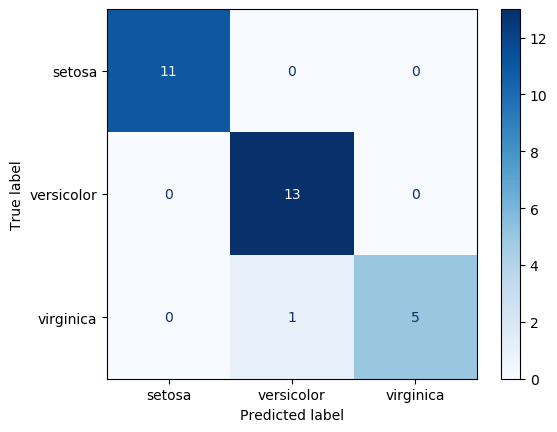

In [6]:
# 混同行列を計算
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(cm)

# 混同行列を表示
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.show()  # プロットを表示